#**Linear Regression**
### *   Created by Ramses Alexander Coraspe Valdez
### *   Created on Agosto 31, 2019

## For the Iris data set (https://archive.ics.uci.edu/ml/datasets/Iris)

### 1.   Will the real iris data please stand up? Bezdek et. al. IEEE Transactions on Fuzzy Systems, Vol 7, Issue 3, pp. 368-369. June 1999.
Many papers have been written that have used the iris dataset obtained from different sources, and some of these datasets contain errors in their data, which has caused a discrepancy between machine learning models created by different authors, in addition to some of them they do not provide the information from where they obtained the dataset, it is proposed to create a central repository for known datasets, although it has already been performed before, was not successfully, so far it is recommended to take the values directly from the Fisher’s paper.

### 2. In this exercise we will apply the Simple Linear Regression method in a simplified manner with the data. For this we will consider the total set of the three types of iris as a single class and we will use only two variables: the length of the petals as an independent (or input) variable and the width of the petal as the dependent (or output) variable. That is, the existence of a linear relationship between the two variables will be sought, regardless of the type of flower.

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

In [3]:
# The iris dataset was uploaded to the directory on my github URL
# After the reading we assign the columns to the panda dataframe
df1 = pd.read_csv('https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Linear%20Regression/iris.data', 
                  sep=',', 
                  names=["sepallength", "sepalwidth", "petallength", "petalwidth", 'class']);
df1.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
#Dropping the sepalwidth and sepallength columns
df1.drop(df1.columns[[0, 1]], axis = 1, inplace = True) 
setosa= df1[df1['class']=='Iris-setosa']
versicolor =df1[df1['class']=='Iris-versicolor']
virginica =df1[df1['class']=='Iris-virginica']

In [4]:
df1.head()

,petallength,petalwidth,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


### i. Obtaining the summary of the 5 numbers of each of the two variables indicated: length and width of the petal. Also obtaining the variance and standard deviation of each one.

In [5]:
df1.describe() 

,petallength,petalwidth
count,150.000000,150.000000
mean,3.758667,1.198667
std,1.764420,0.763161
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


### ii. For each of the two variables obtain the histograms and the box diagrams.
* Both variables are in the same units, correctly distributed.
* The quartiles are correctly appreciated and there is no presence of outliers


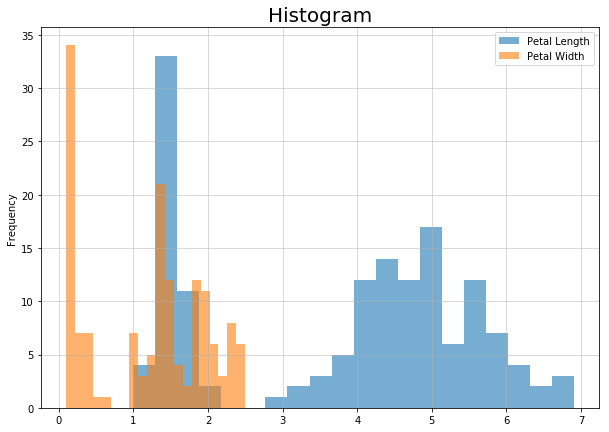

In [6]:
x = df1.petallength 
y = df1.petalwidth
plt.figure(figsize = (10, 7)) 

plt.hist(x, bins=20, alpha=0.6, label='Petal Length' )
plt.hist(y, bins=20, alpha=0.6, label='Petal Width')
plt.grid(True, alpha=0.6)
plt.ylabel("Frequency") 
plt.title("Histogram", fontsize=20)
plt.legend(loc='upper right')
plt.show()

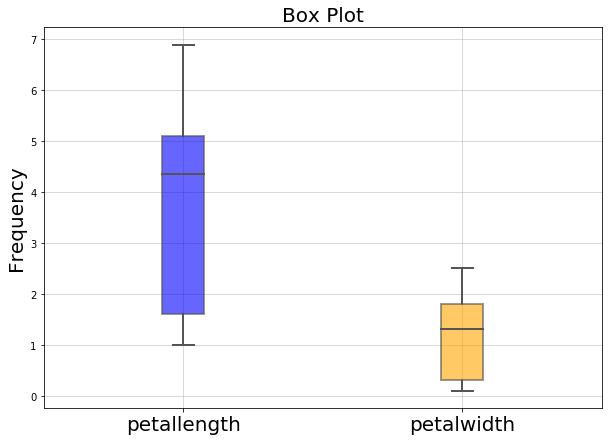

In [6]:
plt.figure(1, figsize=(10, 7))
bp = plt.boxplot([df1.petallength, df1.petalwidth], vert=True, patch_artist=True,
              flierprops={'alpha':0.6, 'markersize': 6,
                   'markeredgecolor': '#555555','marker': 'd',
                   'markerfacecolor': "#555555"}, 
              capprops={'color': '#555555', 'linewidth': 2},
              boxprops={'color': '#555555', 'linewidth': 2},
              whiskerprops={'color': '#555555', 'linewidth': 2},
              medianprops={'color': '#555555', 'linewidth': 2},
              meanprops={'color': '#555555', 'linewidth': 2})
plt.grid(True, alpha=0.6)
plt.title("Box Plot", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(ticks=[1, 2], labels=['petallength', 'petalwidth'], fontsize=20)
bp['boxes'][0].set(facecolor='blue', alpha= 0.6)
bp['boxes'][1].set(facecolor="orange",alpha= 0.6 )
plt.show()

### iii. Obtaining the scatter plot of the variable length against the variable width.
* For each kind of flower it is observed that while the length of the petal grows, the width grows in another proportion.


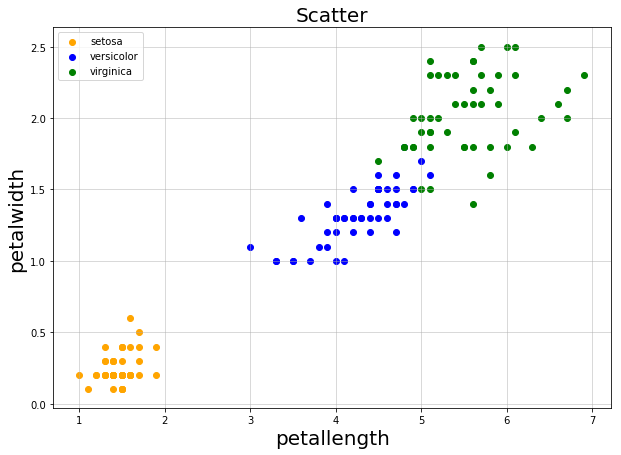

In [7]:
plt.figure(figsize=(10, 7))
plt.scatter(x = setosa.petallength, y = setosa.petalwidth, label="setosa", color='orange')
plt.scatter(x = versicolor.petallength, y = versicolor.petalwidth, label="versicolor", color='b')
plt.scatter(x = virginica.petallength, y = virginica.petalwidth, label="virginica", color='g')

plt.grid(True, alpha=0.6)
plt.title("Scatter", fontsize=20)
plt.xlabel("petallength", fontsize=20) 
plt.ylabel("petalwidth", fontsize=20) 
plt.legend()
plt.show()


### iv. Obtaining the linear regression model (equation) 𝑦 = 𝑎 + 𝑏𝑥 using the least squares method.
![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Linear%20Regression/slope.png)

![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Linear%20Regression/intercept.png)






# **y = -0.36651 + 0.4164*PetalLength**

In [0]:
#Least square method, this will return the Variance and covariance of X and Y (X,Y)= (PetalLength, PetalWidth)
def Least_square(x,y):
  mx = x.mean()
  my = y.mean()
  u=0
  d=0
  e=0
  i=0;
  while(i< len(x)):
      u += ((x[i] - mx)*(y[i] - my))
      d += ((x[i] - mx)**2)
      e += ((y[i] - my)**2)
      i +=1;
  # 𝑦 = 𝑎 + 𝑏𝑥
  #returning a and b
  
  b = u/d
  a = my - b*mx
  
  return a, b, u, d, e

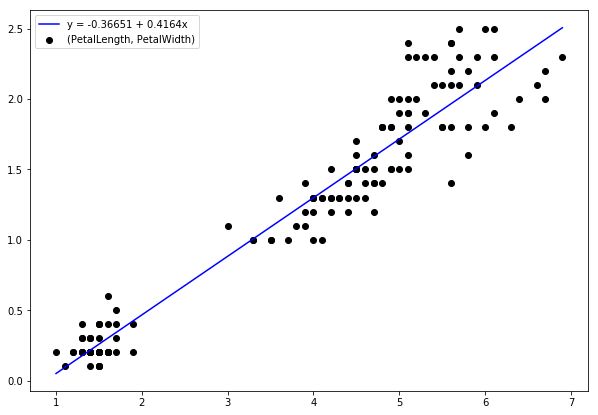

In [12]:
x= df1.petallength
y= df1.petalwidth
a, b, covxy, vx, vy = Least_square(x, y)
yp= a + b*x
plt.figure(figsize=(10, 7))
plt.scatter(x,y,color="black", label= "(PetalLength, PetalWidth)")
plt.plot([min(x), max(x)], [min(yp), max(yp)], color="blue", label="y = -0.36651 + 0.4164x")
plt.legend()
plt.show()

### v. Find and interpret the p-value of the coefficients 𝑎 and 𝑏 found.
![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Linear%20Regression/p-values.png)


### vi. Obtaining the Pearson correlation coefficient and interpret it.
![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Linear%20Regression/pearson.png)



In [16]:
pearson = (covxy/math.sqrt((vx*vy)))
pearson  

0.9627570970509667

In [15]:
# Coefficient of determination
R2 = (pearson**2)
R2

0.9269012279220045

### vii. Based on the results of items v and vi, what can you say about the model found? Do you consider that it is a good model and could be used to make predictions or inferences afterwards?
* In the case of the p-values an excel hypothesis test was performed, both probabilities tell us how likely it is to reject each coefficient, it is the probability that it is equal to zero, to remove it from the equation, both probabilities are very small therefore both coefficients are significant and should not be removed from the linear equation. "The larger the number, the more likely it is to eliminate the coefficient"
* If the variable pearson (r) ≈ +1, there is a direct  linear relationship (with slope increasing) between petalLength and petalWidth. That is, if the petalLength values are increased, then the PetalWidth values are also increased proportionally.


